# CSCI 5897 Homework 3
### Anya Lee

### **Problem 1**
The goal of this problem is to explore the preferential depletion of susceptibles. 

Consider a population with four equal-sized groups, numbered $1, 2, 3, 4$. Suppose that the contact structure in the population is fully mixed (i.e. $c_{ij} = \bar{c}$ for all $i,j$), that $\gamma_i = 3$ for all $i$, and that $R_0=1.5$, under SIR dynamics. Finally, suppose that the susceptibility for group $1$ is $p_1=1$, the susceptibility for group $2$ is $p_2=2$, with $p_3 = 3$ and $p_4=4$. 

a. In terms of $\bar{c}$, $s_1$, $s_2$, $s_3$, and $s_4$ (and constants), what is the next-generation matrix for this system?

The next-generation matrix $G_{ij}$ is:

$$
G_{ij} = \frac{\bar{c}p_{i}s_{i}}{\gamma_{j}} = \frac{\bar{c}}{3}p_i s_i
$$

We can expand this matrix out and write it in terms of $\bar{c}$, $s_1$, $s_2$, $s_3$, and $s_4$ (and constants) as follows:

$$
G =
\frac{\bar{c}}{3}
\begin{pmatrix}
p_1s_1 & p_1s_1 & p_1s_1 & p_1s_1\\
p_2s_2 & p_2s_2 & p_2s_2 & p_2s_2\\
p_3s_3 & p_3s_3 & p_3s_3 & p_3s_3\\
p_4s_4 & p_4s_4 & p_4s_4 & p_4s_4
\end{pmatrix}
=
\frac{\bar{c}}{3}
\begin{pmatrix}
s_1 & s_1 & s_1 & s_1\\
2s_2 & 2s_2 & 2s_2 & 2s_2\\
3s_3 & 3s_3 & 3s_3 & 3s_3\\
4s_4 & 4s_4 & 4s_4 & 4s_4
\end{pmatrix}
$$

b. To ensure that $R_0=1.5$, what must $\bar{c}$ be equal to?

The relationship between $R_0$ and the next-generation matrix is that $R_0$ is equal to the largest eigenvalue of next-generation matrix. Given this, we must find what $\bar{c}$ equals when the largest non-zero eigenvalue of $G$ is 1.5. We know that:

$$
    \lambda_{\text{max}} = \frac{\bar{c}}{3} \sum_{i=1}^4p_is_i
$$

In this equation, we can substitute $\lambda_{max}$ since $\lambda_{max}=R_0=1.5$. So we have:

$$
    1.5 = \frac{\bar{c}}{3} \sum_{i=1}^4p_is_i
$$

Now we can solve for $\bar{c}$.

$$
    \bar{c} = \frac{1.5 \cdot 3}{\sum_{i=1}^4p_is_i} = \frac{4.5}{1+2+3+4} = \frac{4.5}{10} = 0.45
$$

Thus, to ensure that $R_0=1.5$, $\bar{c}$ must be equal to $0.45$.

c. Using these parameters, code up a version of your model with initial conditions where $99.9\%$ of people in each group are susceptible, and the other $0.1\%$ are infected. Simulate an epidemic wave using an appropriate timestep $\Delta t$ and appropriate maximum simulation time to capture the wave. Create a plot of the four populations' $I$ compartments vs time, showing $i_1(t)$, $i_2(t)$, $i_3(t)$, and $i_4(t)$. Color these curves in a single hue, but with varying levels of light/dark or saturation, such that the boldest and darkest line is the most susceptible group, and the faintest and lightest line is the least susceptible group.

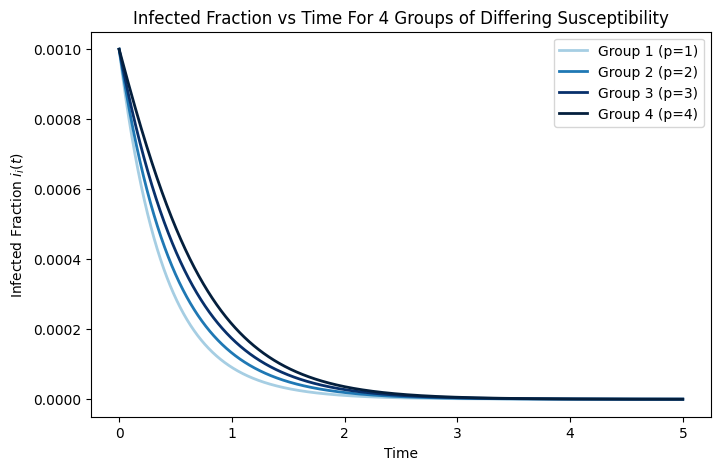

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = np.array([1, 2, 3, 4])     # relative susceptibilities given per group
gamma = 3.0                    # recovery rate from problem statement
R0 = 1.5                       # from part (b)
cbar = 0.45                    # from part (b)
n_groups = len(p)

# Initial conditions
S0 = np.full(n_groups, 0.999)  # 99.9% susceptible
I0 = np.full(n_groups, 0.001)  # 0.1% infected
R0s = np.zeros(n_groups)

# Appropriate timestep settings
dt = 0.001  # time step
t_max = 5
t = np.arange(0, t_max, dt) # time array

# Initialize arrays
S = np.zeros((len(t), n_groups))
I = np.zeros((len(t), n_groups))
R = np.zeros((len(t), n_groups))

S[0], I[0], R[0] = S0, I0, R0s

# Simulation loop using Euler's method
for k in range(1, len(t)):
    I_tot = I[k-1].mean()  # equal group sizes => average
    dS = -p * S[k-1] * cbar * I_tot
    dI = p * S[k-1] * cbar * I_tot - gamma * I[k-1]
    dR = gamma * I[k-1]
    
    S[k] = S[k-1] + dS * dt
    I[k] = I[k-1] + dI * dt
    R[k] = R[k-1] + dR * dt

# Define colors for plotting (light to dark for least to most susceptible groups)
colors = ['#a6cee3', '#1f78b4', '#08306b', '#041f3d']

# Plot i_i(t) curves
plt.figure(figsize=(8,5))
for i in range(n_groups):
    plt.plot(t, I[:, i], color=colors[i], lw=2, label=f'Group {i+1} (p={p[i]})')

plt.xlabel("Time")
plt.ylabel("Infected Fraction $i_i(t)$")
plt.title("Infected Fraction vs Time For 4 Groups of Differing Susceptibility")
plt.legend()
plt.show()


d. Define the average relative susceptibility among the susceptibles at any point in time $\bar{p}(t)$ as $$\bar{p}(t) = \frac{\displaystyle \sum_{i=1}^4 p_i\,s_i(t)}{\displaystyle \sum_{i=1}^4 s_i(t)}\ $$
Note that this is simply a weighted average of the susceptibilities of the susceptibles, by adding up the susceptibilities in the numerator and dividing by the number of susceptibles in the denominator. Over the same time window as your previous plot, create two addition figures: First, show $s_i(t)$ for each $i=1, 2, 3, 4$ using the same color scheme as before. Second, show $\bar{p}(t)$ in black. 

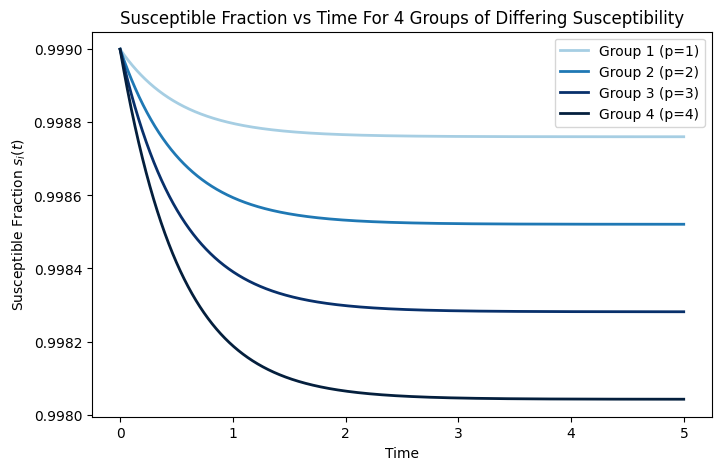

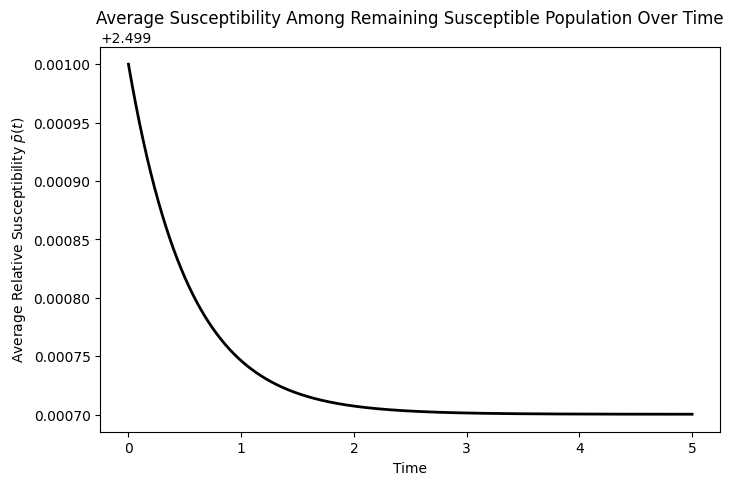

In [2]:
# Same parameters and initial conditions as before
p = np.array([1, 2, 3, 4])
gamma = 3.0
R0 = 1.5
cbar = 0.45
n_groups = len(p)

S0 = np.full(n_groups, 0.999)
I0 = np.full(n_groups, 0.001)
R0s = np.zeros(n_groups)

# Aame time window
dt = 0.001
t_max = 5
t = np.arange(0, t_max, dt)

# Initialize arrays as before
S = np.zeros((len(t), n_groups))
I = np.zeros((len(t), n_groups))
R = np.zeros((len(t), n_groups))

S[0], I[0], R[0] = S0, I0, R0s

# Simulation loop using Euler's method
for k in range(1, len(t)):
    I_tot = I[k-1].mean()  # equal group sizes
    dS = -p * S[k-1] * cbar * I_tot
    dI = p * S[k-1] * cbar * I_tot - gamma * I[k-1]
    dR = gamma * I[k-1]
    
    S[k] = S[k-1] + dS * dt
    I[k] = I[k-1] + dI * dt
    R[k] = R[k-1] + dR * dt

# Compute average relative susceptibility
pbar = (p * S).sum(axis=1) / S.sum(axis=1)

# Define same colors for plotting
colors = ['#a6cee3', '#1f78b4', '#08306b', '#041f3d']

# Plot s_i(t) curves
plt.figure(figsize=(8,5))
for i in range(n_groups):
    plt.plot(t, S[:, i], color=colors[i], lw=2, label=f'Group {i+1} (p={p[i]})')

plt.xlabel("Time")
plt.ylabel("Susceptible Fraction $s_i(t)$")
plt.title("Susceptible Fraction vs Time For 4 Groups of Differing Susceptibility")
plt.legend()
plt.show()

# Plot p̄(t) curve: average relative susceptibility among remaining susceptibles
plt.figure(figsize=(8,5))
plt.plot(t, pbar, color='black', lw=2)
plt.xlabel("Time")
plt.ylabel(r"Average Relative Susceptibility $\bar{p}(t)$")
plt.title("Average Susceptibility Among Remaining Susceptible Population Over Time")
plt.show()


e. Comment on what you observe in the plots, and explain the reason for the patterns in words that a high school student could understand.

In the the Infected Fraction vs Time plot (part (c)), we see that groups with a higher $p_i$ value like Group 3 and 4 (meaning there are more susceptible individuals in the population) have a slower decline in the fraction of infected individuals compared to groups with a lower $p_i$ like Group 1 and 2. Thus, at any point in time, a group with higher susceptibility has a larger fraction of infected individuals. In other words, a larger proportion of susceptibles allows infections to persist longer before the susceptible pool is depleted. In contrast, a smaller proportion of susceptibles means the infection will burn out sooner, and thus result in a faster decline and lower fraction of infected individuals. 
    
In the Susceptible Fraction vs Time plot (part(d)), we see that groups with a higher $p_i$ value (meaning there are more susceptible individuals) lose susceptibles faster. This is shown by the steepness of the curve since it drops sooner and farther. Following this, it is easy to see that the lower $p_i$ with the lowest number of susceptible individuals group declines the slowest. The key concept here is that the most susceptible groups lose their susceptibility sooner. Therefore, the proportion of susceptibles decreases fastest for groups that are more susceptible since a more susceptible group means more individuals are likely to move faster into the infected I compartment. 
    
In the Average Relative Susceptibility plot (part(d)), we see that the average relative susceptibility $\bar{p}(t)$ decreases over time in an exponential decay form. This means that the most susceptible individuals are getting infected first which leaves behind people who are, on average, less susceptible. Thus, as an epidemic spreads, individuals who get infected first are those that are in more susceptible groups.

[Grad/EC] Reflect on these plots in the context of the COVID-19 pandemic. What lessons are there to be drawn from the relationship between an epidemic wave and different groups with different susceptibilities?

The plots demonstrate the dynamics of the COVID-19 pandemic. At the time, we were seeing a more susceptible group such as immunocompromised adults get the worst symptoms of the disease. Some people were also more exposed than others. For example, essential workers such as grocery store cashiers still had to be in person at work, whereas, many in-office jobs allowed workers to work from home remotely. This creates a distinction of who is more susceptible. In addition, we saw that COVID-19 spread quickly among more susceptible groups and those who did not follow countermeasure suggestions. Those who wore masks and practiced social distancing were seen as more protected than those who did not. Then, when the vaccine came out, we saw people who did not vaccinate obtain the pathogen and even die from it. The protection measures made it harder for the coronavirus to target populations. We also observed that when a new variant appeared, susceptibility became high again and thus led to new waves of the disease. 

The main takeaways are that epidemic waves naturally cause a decline in the easiest populations to infect, which are the more susceptible groups. This tells us that in order to best reduce the spread of a disease, the most susceptible groups must take prevention measures and actions more seriously than others to avoid getting infected and become infectious. Lastly, if immunity fades or more variants appear, new outbreaks can occur and it is likely to see the strongest impact on the most susceptible groups.

### **Problem 2**
The goal of this problem is to explore branching processes, and how superspreading can, perhaps surprisingly, increase the likelihood that an outbreak never grows to a large size.

This problem introduces the **negative binomial** (NB) distribution. The distribution can be parameterized a few different ways, but for our purposes, it will be convenient to specify a mean and a dispersion. In the context of transmission chains and branching processes, drawing the number of secondary infections from a negative binomial requires that the mean be $R_0$. However, the dispersion parameter allows us flexibility, and importantly, allows us to model superspreading. 

When $k \to \infty$, the negative binomial distribution converges to a Poisson distribution. When $k = 1$, the negative binomial is equivalent to a geometric distribution. A key difference between these is that the mode of a Poisson---its most common value---is around its mean, while the mode of a Geometric is zero. In the context of branching processes, this means that a high $k$ will lead to more similar numbers of secondary infections for each primary infection. In contrast, a low $k$ will lead to many instances where there are just a few (or zero) secondary infections, and rare instances with a large number of secondary infections. When $k$ is low, we often talk about "superspreaders," people whose infections lead to an exceptionally larger number of secondary infections. 

Note: You can find Python code to draw from a negative binomial with the $R_0$ and $k$ parameterization provided on the next page. For those writing in other languages, be careful to use the correct parameterization (mean and dispersion).

a. Write code for a branching process that, starting from a single infection, draws $G$ generations, with each infection creating $NB(R_0,k)$ additional infections. Use your code to estimate $q$ the probability that an epidemic dies in finite time, for $R_0=3$ and $k=0.1, 0.5, 1.0, 5.0,$ and $10.0$. Provide your answers in a table, out to 3 decimal places.

In [1]:
import numpy as np
from scipy.stats import nbinom
import pandas as pd

# Parameters
R0 = 3.0 # mean
k_vals = [0.1, 0.5, 1.0, 5.0, 10.0] # dispersion values
SIMS = 100_000
MAX_GEN = 100  # number of generations to simulate

rng = np.random.default_rng(12345)  # reproducible random numbers

def nb_params_from_R0_k(R0, k):
    """
    Convert mean (R0) and dispersion (k) to (n, p)
    parameters for scipy.stats.nbinom.
    """
    mean = R0
    variance = mean + (mean ** 2) / k
    p = mean / variance
    n = mean ** 2 / (variance - mean)
    return n, p

def simulate_branching(R0, k, max_gens=MAX_GEN, rng=None):
    """
    Simulate one branching process starting from 1 infection.
    Each infection creates NB(R0, k) additional infections.
    Returns True if the epidemic dies out (extinct, total_size).
    """
    if rng is None:
        rng = np.random.default_rng()
    n, p = nb_params_from_R0_k(R0, k)
    current = 1
    total = 1
    for _ in range(max_gens):
        if current == 0:
            return True, total  # extinct
        # total offspring from current infections:
        # sum of NB(n, p) iid ~ NB(n*current, p)
        offspring = nbinom.rvs(n * current, p, random_state=rng)
        current = int(offspring)
        total += current
        if total > 1e6:  # cap extremely large outbreaks
            return False, total
    return (current == 0), total

# Monte Carlo simulation
results = []
finite_sizes_by_k = {}

for k in k_vals:
    extinct = 0
    finite_sizes = []
    for _ in range(SIMS):
        died_out, total_size = simulate_branching(R0, k, rng=rng)
        if died_out:
            extinct += 1
            finite_sizes.append(total_size)
    q_est = extinct / SIMS
    p_est = 1 - q_est
    results.append({'k': k, 'R0': R0, 'q_est': q_est, 'p_est': p_est, 'finite_outbreaks': len(finite_sizes)})
    finite_sizes_by_k[k] = np.array(finite_sizes)

# Display results
df = pd.DataFrame(results)
df['q_est'] = df['q_est'].round(3)
df['p_est'] = df['p_est'].round(3)
print(df.to_string(index=False))

   k  R0  q_est  p_est  finite_outbreaks
 0.1 3.0  0.837  0.163             83740
 0.5 3.0  0.497  0.503             49719
 1.0 3.0  0.335  0.665             33459
 5.0 3.0  0.120  0.880             11994
10.0 3.0  0.091  0.909              9100


b. How does $k$ affect $q$? Explain what this means in terms of the relationship between $p$ (i.e., $1-q$) and superspreading.

The simulations show that as the dispersion parameter $k$ increases, the estimated value of $q$ - the probabilty that an epidemic dies in finite time - decreases. Thus, the probabilty of a large outbreak $p=1-q$ increases with $k$. When $k$ is small, corresponding to a higher degree of superspreading, most infections cause few or no secondary infections, leading to a greater chance that the oubreak will die out. Therefore, while superspreading can generate very large outbreaks at times, it generally reduces the overall probability that a newly introduced infection will lead to a large epidemic. 

[Grad/EC] How large do finite outbreaks get before they die out? For the parameters above, and for only the *finite* outbreaks, plot a histogram of $100,000$ finite outbreaks for your choice or choices of $k$, and $R_0=3$. What do you observe? 

In [9]:
from scipy.stats import nbinom
import matplotlib.pyplot as plt

def simulate_branching_safe(R0, k, max_gen=1000, max_total=100000):
    """Simulate a single branching process, return total infections if finite and not too large."""
    n, p = nb_params_from_R0_k(R0, k)

    total = 1
    current_gen_size = 1

    for _ in range(max_gen):
        new_cases = nbinom.rvs(n=n, p=p, size=current_gen_size)
        current_gen_size = new_cases.sum()
        total += current_gen_size
        if current_gen_size == 0:
            return total  # outbreak died out
        if total > max_total:  # prevent runaway growth
            return None
    return None

# parameters
R0 = 3
k = 0.1
n_finite = 100000  # num of finite outbreaks to collect

finite_sizes = []
attempts = 0
while len(finite_sizes) < n_finite and attempts < 300000:
    s = simulate_branching_safe(R0, k)
    attempts += 1
    if s is not None:
        finite_sizes.append(s)

print(f"Collected {len(finite_sizes)} finite outbreaks out of {attempts} attempts")

Collected 100000 finite outbreaks out of 119184 attempts


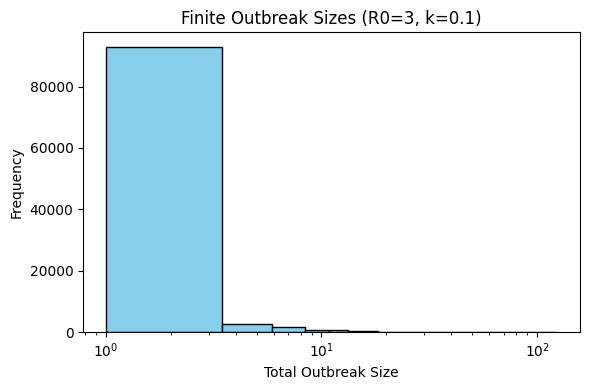

In [10]:
# plot histogram
plt.figure(figsize=(6,4))
plt.hist(finite_sizes, bins=50, color='skyblue', edgecolor='k')
plt.title(f"Finite Outbreak Sizes (R0={R0}, k={k})")
plt.xlabel("Total Outbreak Size")
plt.ylabel("Frequency")
plt.xscale('log')  # log scale shows long-tailed nature
plt.tight_layout()
plt.show()

In [11]:
print(f"The largest outbreak out of {len(finite_sizes)} finite outbreaks had size {max(finite_sizes)}.")

The largest outbreak out of 100000 finite outbreaks had size 124.


According to the simulation, the largest finite outbreak out of $100,000$ finite outbreaks had size 124 for $k=0.1$ and $R_0=3$. From the histogram, we can see that most finite outbreaks are very small, while there are a few that grow moderately large, producing a strongly right-skewed, heavy-tailed distribution.

I chose $k=0.1$ to simulate strong superspreading, where most individuals cause few or no secondary infections, but a few may generate many. This pattern results in many short-lived transmission chains and a small number of larger but still finite outbreaks. Thus, even with $R_0=3$, the largest outbreaks remain limited in size, reflecting how superspreading increases the likelihood of early extinction despite occasional large events. This histogram displays what we expect.


Here is some Python code to draw from $NB(R_0, k)$:

from scipy.stats import nbinom

k = 10000 # Dispersion Parameter k

R0 = 3 # Mean R0

mean = R0

variance = mean + (mean**2)/k 

p = mean/variance 

n = mean**2 / (variance - mean) 

draw = nbinom.rvs(n=n,p=p)

draws = nbinom.rvs(n=n,p=p,size=10)
